In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
non_numeric_dataset = pd.read_csv(r"C:\Users\Shaivy\Desktop\inductions\databyte\house price\Melbourne_housing_FULL.csv")
 
# Printing first 5 records of the dataset
print(dataset.head(5))

       Suburb             Address  Rooms Type      Price Method SellerG   
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis  \
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea   
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN  \
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             R

In [ ]:
# Remove non-numeric columns

dataset = non_numeric_dataset.select_dtypes(include=[np.number])

# Handle missing values
dataset = non_numeric_dataset.dropna()  # Drop rows with missing values
# or numeric_dataset = numeric_dataset.fillna(0)  # Fill missing values with 0

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

# Show the plot
plt.show()


Categorical variables: 8
Integer variables: 0
Float variables: 12


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

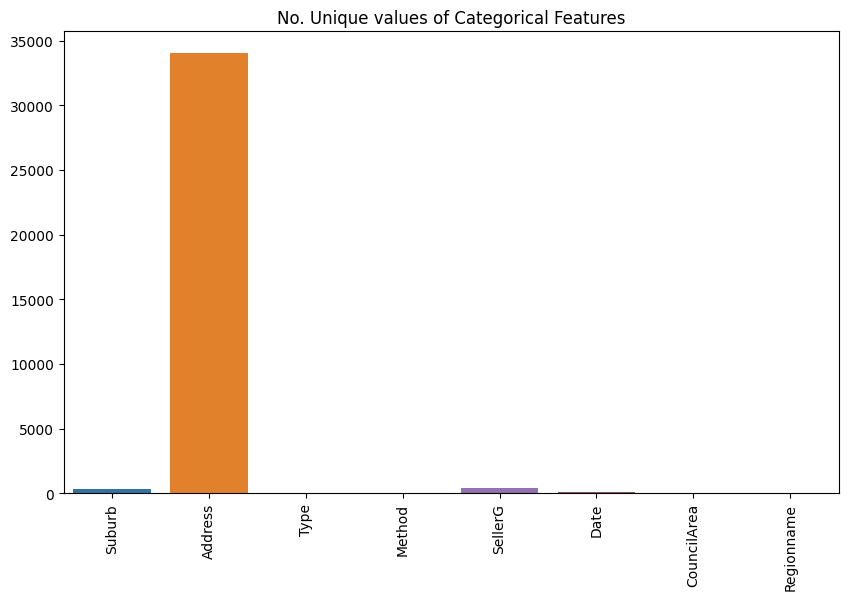

In [5]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    ax = plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    ax.remove()
    index += 1

plt.tight_layout()
plt.show()


In [ ]:
dataset['Price'] = dataset['Price'].fillna(dataset['Price'].mean())

new_dataset = dataset.dropna()
new_dataset.drop(['Postcode', "Lattitude" , "Longtitude" ], axis=1)
print(new_dtatset.head())

In [11]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))


Categorical variables:
['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
No. of. categorical features:  8


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create an instance of OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index

# Get the column names for the one-hot encoded features
feature_names = OH_encoder.get_feature_names_out(object_cols)
OH_cols.columns = feature_names

# Drop the original categorical columns from the dataset
df_final = new_dataset.drop(object_cols, axis=1)

# Concatenate the one-hot encoded columns with the remaining columns
df_final = pd.concat([df_final, OH_cols], axis=1)


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['Price'], axis=1)
Y = df_final['Price']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

In [ ]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    ax = plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    ax.remove()
    index += 1

plt.tight_layout()
plt.show()